In [144]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt


data = pd.read_csv("dataset.csv")

In [145]:
data.head(5)

,DATE,SALES
0,9/30/18,39
1,10/1/18,25
2,10/2/18,48
3,10/3/18,32
4,10/4/18,87


In [146]:
data.tail(5)

,DATE,SALES
168,3/21/19,32
169,3/22/19,11
170,3/23/19,22
171,3/24/19,29
172,3/25/19,14


In [147]:
data.isnull().sum()

DATE     0
SALES    0
dtype: int64

In [172]:
#h =pd.to_datetime(data['DATE'].index.values)

In [173]:
h

DatetimeIndex([          '1970-01-01 00:00:00',
               '1970-01-01 00:00:00.000000001',
               '1970-01-01 00:00:00.000000002',
               '1970-01-01 00:00:00.000000003',
               '1970-01-01 00:00:00.000000004',
               '1970-01-01 00:00:00.000000005',
               '1970-01-01 00:00:00.000000006',
               '1970-01-01 00:00:00.000000007',
               '1970-01-01 00:00:00.000000008',
               '1970-01-01 00:00:00.000000009',
               ...
               '1970-01-01 00:00:00.000000163',
               '1970-01-01 00:00:00.000000164',
               '1970-01-01 00:00:00.000000165',
               '1970-01-01 00:00:00.000000166',
               '1970-01-01 00:00:00.000000167',
               '1970-01-01 00:00:00.000000168',
               '1970-01-01 00:00:00.000000169',
               '1970-01-01 00:00:00.000000170',
               '1970-01-01 00:00:00.000000171',
               '1970-01-01 00:00:00.000000172'],
              dtype=

In [149]:
data.head()

,DATE,SALES
0,9/30/18,39
1,10/1/18,25
2,10/2/18,48
3,10/3/18,32
4,10/4/18,87


### converting date into numerical

In [150]:
data['DATE'] = pd.to_datetime(data['DATE'])
data['DATE'] = data['DATE'].map(dt.datetime.toordinal)

In [151]:
data.head(5)

,DATE,SALES
0,736967,39
1,736968,25
2,736969,48
3,736970,32
4,736971,87


In [152]:
y = data['SALES']
x = data['DATE']

In [153]:
y , x

(0      39
 1      25
 2      48
 3      32
 4      87
        ..
 168    32
 169    11
 170    22
 171    29
 172    14
 Name: SALES, Length: 173, dtype: int64,
 0      736967
 1      736968
 2      736969
 3      736970
 4      736971
         ...  
 168    737139
 169    737140
 170    737141
 171    737142
 172    737143
 Name: DATE, Length: 173, dtype: int64)

In [154]:
meanx= np.mean(x)
meany= np.mean(y)

In [155]:
meanx, meany

(737054.7803468208, 31.017341040462426)

In [156]:
n = len(x)

In [157]:
n

173

In [158]:
upper =0
down =0

for i in range(n):
    upper +=(x[i] -meanx)*(y[i]-meany)
    down +=(x[i]- meanx)**2
        
m = upper / down
c = meany - (m*meanx)

In [159]:
m,c

(-0.2053196921334329, 151362.8779273247)

In [160]:
maxx = np.max(x)+100

In [161]:
maxx

737243

In [162]:
minx = np.min(x)-100
minx

736867

In [163]:
X = np.linspace(minx,maxx,1000)

In [164]:
Y = m*X + c

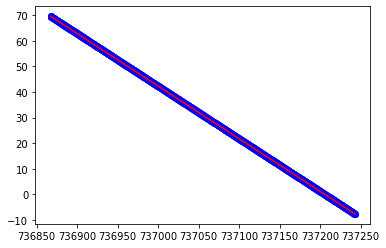

In [165]:
plt.plot(X,Y,color='red', label='Regression line')
plt.scatter(X,Y,color='blue', label='scatter plot')

In [166]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [177]:
X= x.values.reshape((m,1))
reg= LinearRegression()
reg= reg.fit(x,y)

ypred = reg.predict(x)
r2score= reg.score(x,y)

ValueError: Expected 2D array, got 1D array instead:
array=[736967 736968 736969 736970 736971 736972 736973 736974 736975 736976
 736977 736978 736979 736980 736981 736982 736983 736984 736985 736986
 736987 736988 736989 736990 736991 736992 736994 736995 736996 736997
 736998 736999 737000 737001 737002 737003 737004 737005 737006 737007
 737008 737009 737010 737011 737012 737013 737014 737015 737016 737017
 737018 737019 737020 737021 737022 737023 737024 737025 737026 737027
 737028 737029 737030 737031 737032 737033 737034 737035 737036 737037
 737038 737039 737040 737041 737042 737043 737044 737045 737046 737047
 737048 737049 737050 737051 737052 737053 737054 737055 737056 737057
 737058 737060 737061 737062 737063 737064 737065 737066 737067 737068
 737069 737070 737071 737072 737073 737074 737075 737076 737077 737078
 737079 737080 737081 737082 737083 737084 737085 737086 737087 737088
 737089 737090 737091 737092 737094 737095 737096 737097 737098 737099
 737100 737101 737102 737103 737104 737105 737106 737107 737108 737109
 737110 737111 737112 737114 737115 737116 737117 737118 737119 737120
 737121 737122 737123 737124 737125 737126 737127 737128 737129 737130
 737131 737132 737133 737134 737135 737136 737137 737138 737139 737140
 737141 737142 737143].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.